In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402

import utils

In [4]:
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

In [5]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Berlin-Center" #"Anaheim" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])

In [6]:
block_centroids = True
r_gap = 1e-6

In [7]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=block_centroids, rgap=r_gap)

bush-based Assignment STATS
 Initialised data structures, num nodes = 12981, num links = 28370
 0th iteration done, cost = 138388592.0
Iteration 1, computed gap: 0.040075364192096785, computed objective: 21001144.0
Iteration 2, computed gap: 0.007744450036352046, computed objective: 20851174.0
Iteration 3, computed gap: 0.0017915056346635705, computed objective: 20825778.0
Iteration 4, computed gap: 0.00048045018361675407, computed objective: 20819988.0
Iteration 5, computed gap: 0.00014433651679213177, computed objective: 20818556.0
Iteration 6, computed gap: 6.0471486488800075e-05, computed objective: 20818150.0
Iteration 7, computed gap: 1.5851578964998225e-05, computed objective: 20818042.0
Iteration 8, computed gap: 9.22536319258871e-06, computed objective: 20818008.0
Iteration 9, computed gap: 6.4285690826171304e-06, computed objective: 20818020.0
Iteration 10, computed gap: 2.1443845963364794e-06, computed objective: 20817996.0
Iteration 11, computed gap: 5.670692967418844e-07, 

In [8]:
%%time
bfw_rgap = 1e-5
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=bfw_rgap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.8294424966424773,0.8219500681367815
3,0.017585239365668037,0.4872589798248247
4,0.0033571994793841083,0.4433839240585806
5,0.0029840045520197842,0.36243373494524944
6,0.0022132660999176594,0.370533415525226
7,0.001607904026034061,0.568735148813483
8,0.00203334420519815,0.327284356146891
9,0.0015531895719378102,0.27444880136032596
10,0.0008972887874323961,0.37739922552398686
11,0.0006963659391440302,0.32268506396917335
12,0.0005348840891890261,0.2567376103299869
13,0.0005740686641122526,0.33472109949618345
14,0.0005539344003570775,0.2358796809147738
15,0.00037796334819539725,0.544416862723352
16,0.0005378185807901846,0.10874782005674413
17,0.00024992022326366395,0.11473211345934493
18,0.0002374098954528657,0.29028235139439684
19,0.00020124222417523208,0.26393141152116
20,0.0001337274118212947,0.2828425492363143
21,0.00012678556078948977,0.43241563433371294
22,0.000127734404931889,0.06723920198085898
23,8.343373429450407

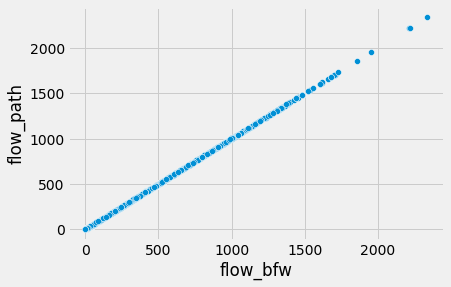

max diff in flow = 11.037
max rel diff in flow = 3135.206%


,a_node,b_node,flow_bfw,flow_path,abs_change,rel_change
21335,9575,9577,267.870752,256.834167,11.036584,0.041201
21345,9580,9577,524.367248,535.403748,11.036499,0.021047
21327,9572,9575,42.653791,33.313732,9.340059,0.218974
21344,9580,9572,302.768578,293.565704,9.202874,0.030396
8837,3613,7958,315.128096,306.269104,8.858992,0.028112
8824,3607,3613,315.128096,306.269104,8.858992,0.028112
17851,7958,9268,28.110093,19.251133,8.858960,0.315152
21227,9530,9529,35.005093,26.146133,8.858960,0.253076
21229,9531,9530,35.005093,26.146133,8.858960,0.253076
20690,9267,9537,66.083093,57.224140,8.858953,0.134058


In [9]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');

#full_result = full_result.merge(best_sol, on=['a_node', 'b_node'], how='outer')
#sns.scatterplot(data=full_result, x='flow_best', y='flow_path');

plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))
#display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'flow_best', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))